# 2019 Stack Overflow Survey Analysis  

### 1. Introduction 

The Stack Overflow community website is a major resource for programmers worldwide looking for answers to tough questions. As a result, Stack Exchange Inc. has taken to doing a yearly Developer Survey by recruiting users through channels like onsite messages and ads, social media ads and e-mail lists, and they publish the results publically. They call this survey 'the largest and most comprehensive survey of software developers', and this distinction makes the survey a revealing microcosm of the world of working with software. So let's dive in and see what it can teach us.

In [1]:
# to handle datasets
import numpy as np
import pandas as pd
from collections import Counter

# to visualise all the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

# to make plots
import matplotlib.pyplot as plt
import seaborn as sns

# to change plot style
sns.set(style="darkgrid")

# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

C:\Users\srodri10\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm



### 2. Understanding the Business

I'm very interested in the ratio between men and women in the software developers comunity in Spain.

On the other hand and with a general interest I would like to know preferences and subjective experiences of people in the workforce. 

And Finally I also would like to know if there is a relationship between the level of influence over new technology purchase and the worker satisfaction within a organization.

Because of this I will try to respond these three questions to explore in my investigation:

#### Question #1: Which is the ratio between men and women in 2020? Which is the variation respect to the previous year?

#### Question #2: Python vs Java: Does the age of developers influence which programming languages they know or want to learn?

#### Question #3: People with higher influence over the technology purchase show higher satisfaction than people with less influence?

### 3. Understanding the Data

As mentioned before, for this project I'm using the 2019 and 2020 Stack Overflow Annual Developer Survey.

In [3]:
# Reading Stackoverflow survey data from years 2019 and 2020
df_2019 = pd.read_csv('data/2019/survey_results_public.csv')
df_2020 = pd.read_csv('data/2020/survey_results_public.csv')

In [2]:
# Reading Stackoverflow survey schema for both years
df_shcema_2019 = pd.read_csv('data/2019/survey_results_schema.csv')
df_shcema_2020 = pd.read_csv('data/2020/survey_results_schema.csv')

In [4]:
#Let's look at df_2019
df_2019.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technolo

In [5]:
#Let's look at df_2020
df_2020.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

In [6]:
print("Size df_2019:", df_2019.shape)
print("Size df_2020:", df_2020.shape)

Size df_2019: (88883, 85)
Size df_2020: (64461, 61)


Attention: Surveys have different number of attributes/questions (85 in 2019 and 61 in 2020)

The number of responses is close to 90K in 2019 and 65K in 2020

In [7]:
df_shcema_2019

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open sour...
...,...,...
80,Sexuality,Which of the following do you currently identi...
81,Ethnicity,Which of the following do you identify as? Ple...
82,Dependents,"Do you have any dependents (e.g., children, el..."
83,SurveyLength,How do you feel about the length of the survey...


In [8]:
df_shcema_2020

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...
...,...,...
56,WebframeWorkedWith,Which web frameworks have you done extensive d...
57,WelcomeChange,"Compared to last year, how welcome do you feel..."
58,WorkWeekHrs,"On average, how many hours per week do you wor..."
59,YearsCode,"Including any education, how many years have y..."


In [9]:
# Take a look at the number of different countries in each year
df_2019.Country.nunique()

179

In [10]:
df_2020.Country.nunique()

183

In [11]:
#Before merge both years I'll create a new variable adding the year of the survey
df_2019['Survey_Year']=2019
df_2020['Survey_Year']=2020

In [12]:
print("Size df_2019:", df_2019.shape)
print("Size df_2020:", df_2020.shape)

Size df_2019: (88883, 86)
Size df_2020: (64461, 62)


In [13]:
df_2019.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase,Survey_Year
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult,2019
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult,2019
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, framewor

In [14]:
df_2020.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro,Survey_Year
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27,2020
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4,2020
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN,2020
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for

In [15]:
#I'll create a new dataframe with the results from 2019 and 2020

Total_df=df_2019.append(df_2020)

In [16]:
Total_df.shape

(153344, 104)

In [17]:
#Total_Spain_df will be the df containing only results from Spain

Total_Spain_df = Total_df[(Total_df.Country == "Spain")]

In [18]:
Total_Spain_df.shape

(2765, 104)

In [19]:
#Since I'm interested in the split by gender let check this variable
Total_Spain_df.Gender.value_counts()

Man                                                            2361
Woman                                                           135
Non-binary, genderqueer, or gender non-conforming                14
Woman;Non-binary, genderqueer, or gender non-conforming           2
Man;Non-binary, genderqueer, or gender non-conforming             2
Woman;Man;Non-binary, genderqueer, or gender non-conforming       1
Name: Gender, dtype: int64

### Question #1: 
### Which is the ratio between men and women in 2020 and the variation respect to the previous year?

In the next lines you will see how is the proportion between men and women in Spain in 2019 and 2020

It's a shame to check the low proportion of women in the survey, less than 6% in both years.

Beacuse of this it is neccesary to address widening gender gap in STEM careers.

On the other hand, the increase of this proportion is just 1 p.p between 2019 and 2020 (5.02% vs 5.93%)

It's neccesary to encourage initiatives providing girls and women with the confidence, tools, knowledge and support to enter, and flourish, in the world of coding!



In [20]:
Total_Spain_df.groupby(['Survey_Year'])['Gender'].value_counts()

Survey_Year  Gender                                                     
2019         Man                                                            1485
             Woman                                                            79
             Non-binary, genderqueer, or gender non-conforming                 5
             Woman;Man;Non-binary, genderqueer, or gender non-conforming       1
             Woman;Non-binary, genderqueer, or gender non-conforming           1
2020         Man                                                             876
             Woman                                                            56
             Non-binary, genderqueer, or gender non-conforming                 9
             Man;Non-binary, genderqueer, or gender non-conforming             2
             Woman;Non-binary, genderqueer, or gender non-conforming           1
Name: Gender, dtype: int64

In [25]:
#Let's see how many men and women responded in each year
Count_Gender=Total_Spain_df.groupby(['Gender','Survey_Year']).agg({'Gender': 'count'})

In [28]:
Count_Gender

Gender
Gender                                             Survey_Year        
Man                                                2019           1485
                                                   2020            876
Man;Non-binary, genderqueer, or gender non-conf... 2020              2
Non-binary, genderqueer, or gender non-conforming  2019              5
                                                   2020              9
Woman                                              2019             79
                                                   2020             56
Woman;Man;Non-binary, genderqueer, or gender no... 2019              1
Woman;Non-binary, genderqueer, or gender non-co... 2019              1
                                                   2020              1

In [29]:
#Since the sample size is different in each year, I have to normalize or obtain the percentage

Pcts_Gender = Count_Gender.groupby(level=1).apply(lambda x:
                                                 100 * x / float(x.sum()))

In [30]:
Pcts_Gender

Gender
Gender                                             Survey_Year           
Man                                                2019         94.525780
                                                   2020         92.796610
Man;Non-binary, genderqueer, or gender non-conf... 2020          0.211864
Non-binary, genderqueer, or gender non-conforming  2019          0.318269
                                                   2020          0.953390
Woman                                              2019          5.028644
                                                   2020          5.932203
Woman;Man;Non-binary, genderqueer, or gender no... 2019          0.063654
Woman;Non-binary, genderqueer, or gender non-co... 2019          0.063654
                                                   2020          0.105932

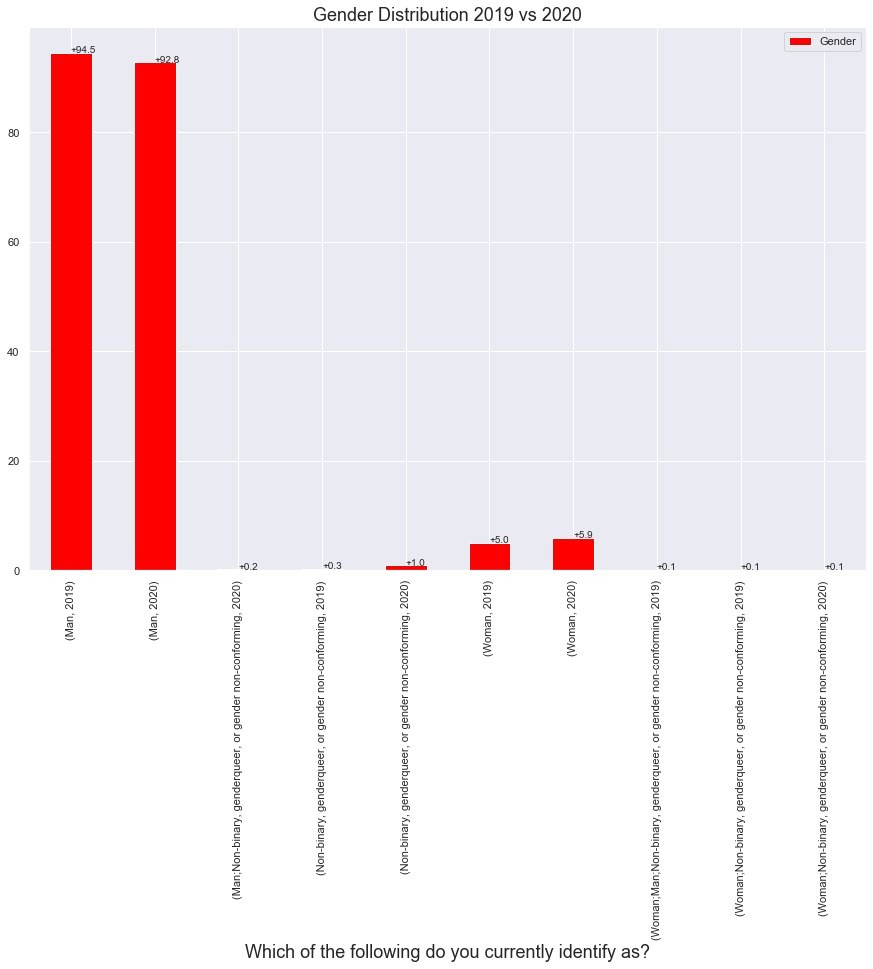

In [123]:

ax=Pcts_Gender.plot(color='red',kind='bar',figsize=(15, 10))
ax.set_title("Gender Distribution 2019 vs 2020", fontsize=18)
ax.set_xlabel("Which of the following do you currently identify as?", fontsize=18);

x_offset = 0
y_offset = 0
for p in ax.patches:
    b = p.get_bbox()
    val = "{:+.1f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))


### Question 2: 
### Python vs Java: Does the age of developers influence which programming languages they know or want to learn?

Java and Python are two of the hottest programming languages in the market right now because of their versatility, efficiency, and automation capabilities. Both languages have their merits and their flaws, but the main difference is that Java is statically typed and Python is dynamically typed.

They have similarities, as they both adopt the “everything is an object” design, have great cross-platform support, and use immutable strings and deep standard libraries. However, they have plenty of differences that steer some coders towards Java and others towards Python. Java has always had a single large corporate sponsor, while Python is more distributed.


For this analysis, I plan to use a line graph, with the the age of the survey respondents plotted on the x-axis and the lines representing the value counts of each programming language represented (Java and Python). 

In [79]:
def plot_category_counts(df, numerical_column, categorical_column, 
                         to_drop, title, x_label, y_label):
    ''' Takes a column of sequential numerical data and a column of string values,
    makes a new dataframe out of their information, and returns a line graph 
    of the reshaped data.
    
    Params
    ======
    df (str): the dataframe to be used
    numerical_column (str): the column of numerical data to be used to plot on the x-axis
    categorical_colun (str): the column of categorical data to be plotted on the y-axis
    to_drop (str): the columns to be dropped from the table
    title (str): the title of the line graph
    x_label (str): the label of the x-axis
    y_label (str): the label of the y-axis
    '''
    # Make a list of sequential numerical data columns
    numerical_order = df[numerical_column].unique()
    
    # Make categorical data counts and sequential numerical data into a dictionary, using a loop
    categorical_counts = {}
    for num in numerical_order:
        counts_per_num = df[df[numerical_column].isin([num])]
        counts_per_num = counts_per_num[categorical_column].str.cat(sep=';')
        counts_per_num = pd.Series(counts_per_num.split(';'))
        counts_per_num = counts_per_num.value_counts()
        categorical_counts[num] = counts_per_num

    # Create a new dataframe using the dictionary, with numbers as columns and categories as rows
    df_cat_counts = pd.DataFrame()
    for k, v in categorical_counts.items():
        df_cat_counts[k] = v

    # Switch category counts and numbers using the'transpose' method, and sort the values to match
    df_cat_counts = df_cat_counts.transpose()
    df_cat_counts = df_cat_counts.sort_index()

    # Drop the less prevalent/relevant columns of data
    df_cat_counts.drop(to_drop, axis=1, inplace=True)
    # Bound respondents
    df_cat_counts = df_cat_counts.iloc[0:40]

    # Plot the resulting information in a line graph
    ax = df_cat_counts.plot(figsize=(20,10), kind='line', colormap='gist_rainbow')
    ax.set_title(title, fontsize=20)
    ax.set_xlabel(x_label, fontsize=18)
    ax.set_ylabel(y_label, fontsize=18);

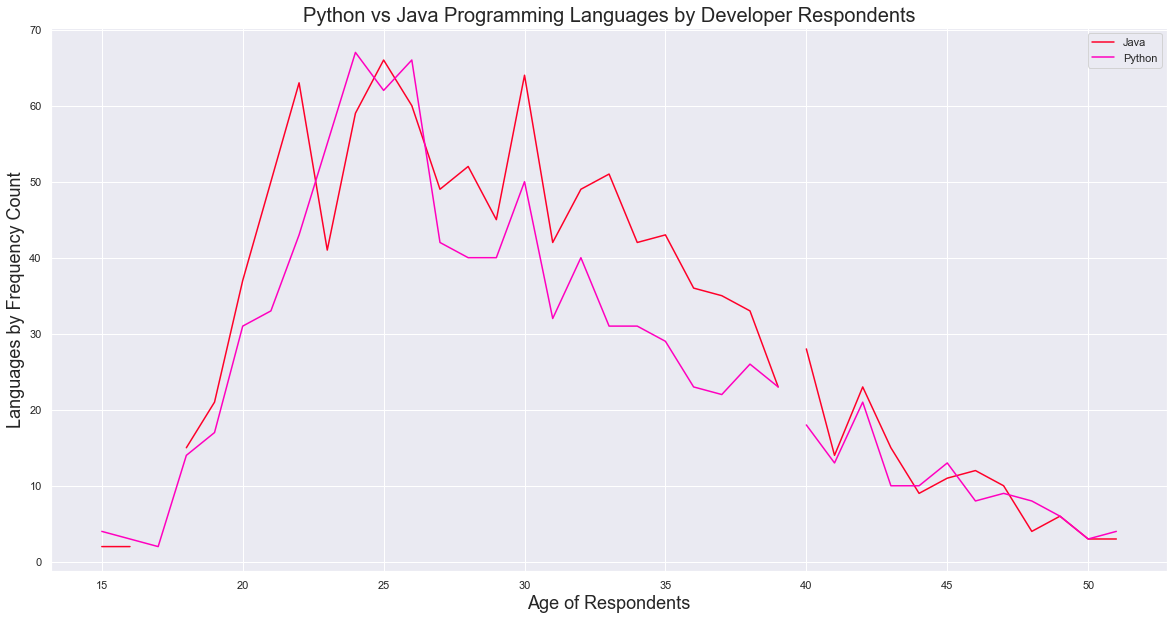

In [128]:
# Use the new function on the 'Age' and 'LanguageWorkedWith' columns
to_drop = ['Other(s):', 'Ruby', 'Go', 'Assembly', 'Swift', 'Kotlin', 
           'Objective-C', 'Scala', 'Rust', 'Dart', 'Elixir',
           'Clojure', 'WebAssembly', 'Erlang','JavaScript',
           'HTML/CSS','SQL','Bash/Shell/PowerShell',
          'TypeScript','PHP','C++','C','R','Scala','Erlang',
          'C#','VBA']
plot_category_counts(Total_Spain_df, 'Age', 'LanguageWorkedWith', to_drop,
                     'Python vs Java Programming Languages by Developer Respondents',
                     'Age of Respondents',
                     'Languages by Frequency Count')

This graph shows that Java is used more often in the range of age between 25 and 35 than  Python. 

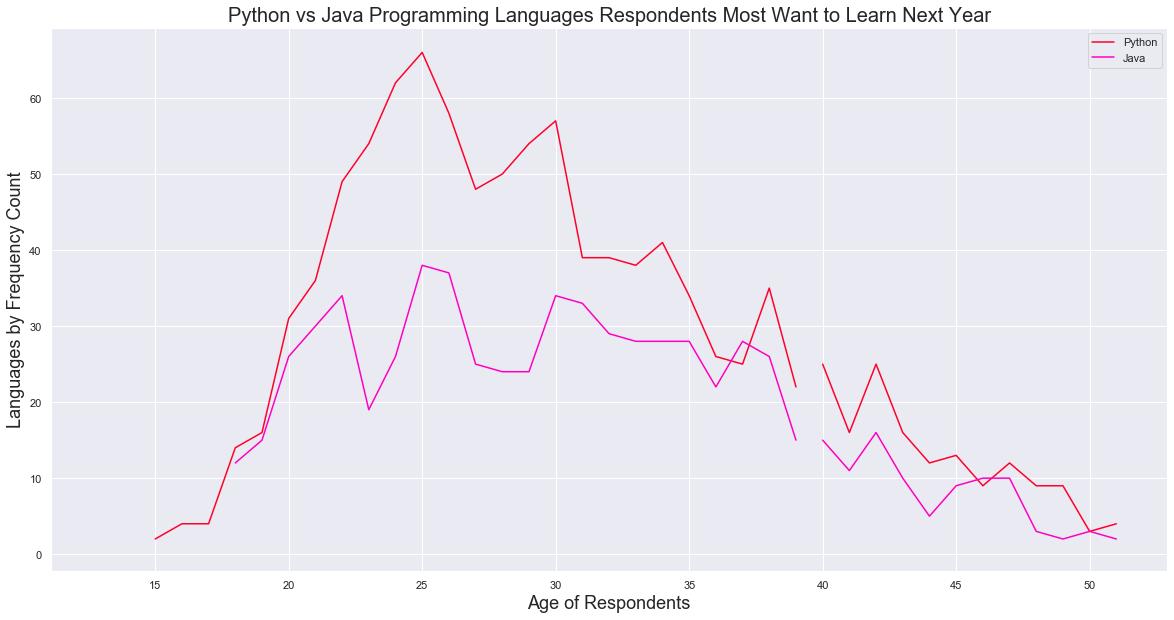

In [129]:

# Use the function on the 'Age' and 'LanguageDesireNextYear' columns
to_drop = ['Other(s):', 'Ruby', 'Go', 'Assembly', 'Swift', 'Kotlin', 
           'Objective-C', 'Scala', 'Rust', 'Dart', 'Elixir',
           'Clojure', 'WebAssembly', 'Erlang','JavaScript',
           'HTML/CSS','SQL','Bash/Shell/PowerShell',
          'TypeScript','PHP','C++','C','R','Scala','Erlang',
          'C#','Haskell','Julia']
plot_category_counts(Total_Spain_df, 'Age', 'LanguageDesireNextYear', to_drop,
                     'Python vs Java Programming Languages Respondents Most Want to Learn Next Year',
                     'Age of Respondents',
                     'Languages by Frequency Count')


The figure shows how clearly Python is the most desired language for the future in all age ranges but especially from 20 to 35 years old

### Question #3: 
### People with higher influence over the technology purchase show higher satisfaction than people with less influence?

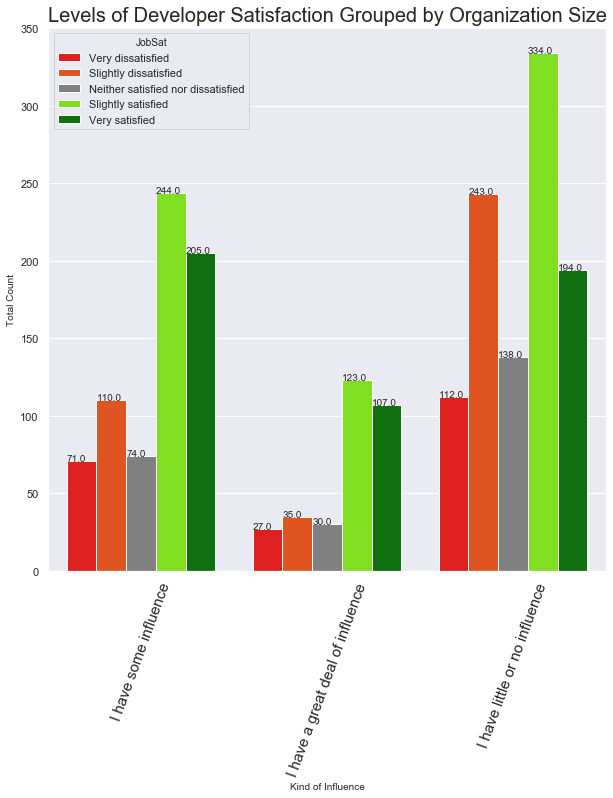

In [136]:
# Make a new dataframe that drops all rows with null values in the OrgSize and JobSat columns
df_aux = Total_Spain_df.dropna(subset=['PurchaseWhat', 'JobSat'], axis=0)

# Make a clustered bar chart of job satisfaction grouped by organization size
palette={'Very dissatisfied':'red', 'Slightly dissatisfied':'orangered',
         'Neither satisfied nor dissatisfied':'grey', 'Slightly satisfied':'chartreuse',
         'Very satisfied':'green'}
fig, ax = plt.subplots(figsize=(10, 10))
sns.countplot(ax=ax, x='PurchaseWhat', hue='JobSat', data=df_aux,
              hue_order=['Very dissatisfied', 'Slightly dissatisfied',
                        'Neither satisfied nor dissatisfied',
                        'Slightly satisfied', 'Very satisfied'],
              palette=palette)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15, rotation=70)
ax.set_title('Levels of Developer Satisfaction Grouped by Organization Size', fontsize=20)
ax.set_xlabel('Kind of Influence', fontsize=10)
ax.set_ylabel('Total Count', fontsize=10);

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()))


It is clearly appreciated that the workers who have a great deal of influence are the most satisfied in their jobs, but  the majority have little or no influence

### Others:

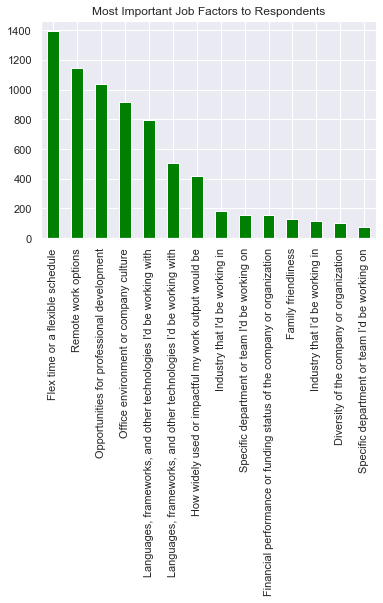

In [124]:
# Find out what job factors are most important to respondents during these last 2 years
job_factors = Total_Spain_df.JobFactors.str.split(';', expand=True).stack().value_counts()
job_factors.plot(kind='bar', color='green')
plt.title('Most Important Job Factors to Respondents');

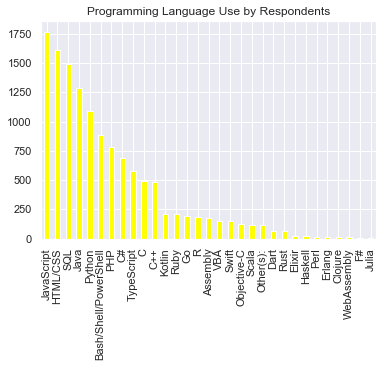

In [125]:
# Find out which programming languages are used most often by respondents during these last two years
programming_language = Total_Spain_df.LanguageWorkedWith.str.split(';', expand=True).stack().value_counts()
programming_language.plot(kind='bar', color='yellow')
plt.title('Programming Language Use by Respondents');

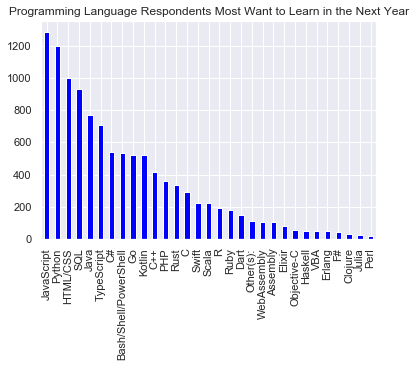

In [126]:
# Find out which Programming Language Respondents Most Want to Learn in the Next Year in the last two years
programming_language = Total_Spain_df.LanguageDesireNextYear.str.split(';', expand=True).stack().value_counts()
programming_language.plot(kind='bar', color='blue')
plt.title('Programming Language Respondents Most Want to Learn in the Next Year');

In [41]:
Total_Spain_df.sort_values(['Hobbyist'],ascending=True).groupby(['Gender'])['Hobbyist'].value_counts()

Gender                                                       Hobbyist
Man                                                          Yes         1855
                                                             No           506
Man;Non-binary, genderqueer, or gender non-conforming        No             1
                                                             Yes            1
Non-binary, genderqueer, or gender non-conforming            Yes           12
                                                             No             2
Woman                                                        Yes           87
                                                             No            48
Woman;Man;Non-binary, genderqueer, or gender non-conforming  Yes            1
Woman;Non-binary, genderqueer, or gender non-conforming      Yes            2
Name: Hobbyist, dtype: int64

In [127]:
#Compare the salary between men and women
#Due to the low sample size and because for many women code is just as Hobby there is a lack of statistical robust and bias
comparison = Total_Spain_df.groupby(['Survey_Year','Gender'])['CompTotal'].mean()
comparison

Survey_Year  Gender                                                     
2019         Man                                                            32351.443463
             Non-binary, genderqueer, or gender non-conforming              21500.000000
             Woman                                                          23096.017857
             Woman;Man;Non-binary, genderqueer, or gender non-conforming     1936.000000
             Woman;Non-binary, genderqueer, or gender non-conforming        51000.000000
2020         Man                                                            34672.773134
             Man;Non-binary, genderqueer, or gender non-conforming          17450.000000
             Non-binary, genderqueer, or gender non-conforming              14957.500000
             Woman                                                          31931.764706
             Woman;Non-binary, genderqueer, or gender non-conforming        18000.000000
Name: CompTotal, dtype: float64